# Salary Model Version 1
## Author: Xiaochi (George) Li

Input: "processed_data.pickle" from the preprocessing part  
Spec: No missing value, target variable "salary" should be the last column

Reference: Python Machine Learning (PyML) 2nd Sebastian Raschka

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_pickle("processed_data.pickle")
print("shape:",df.shape)

num_cols = ['Total Payments', 'Lump Sum Pay', 'Other Pay (Payroll Explorer)',
       'FMS Department', 'Job Class', 'Average Benefit Cost', 'p_dep',
        'Rate', 'p_bonus', 't_bonus', 'o_pay', 'long', 'e_pay',
        'insurance', 'financial']
cat_cols = ['e_type', 'benefit', 'Time', 'p_grade']


shape: (80000, 20)


In [113]:
df_sample = df.sample(n=int(df.shape[0]*0.1),random_state=42)
cols=num_cols + ['Salary']
df_sample = df_sample[cols]
df_sample.shape

(8000, 16)

In [4]:
#ToDO : draw box plot for categorical variables

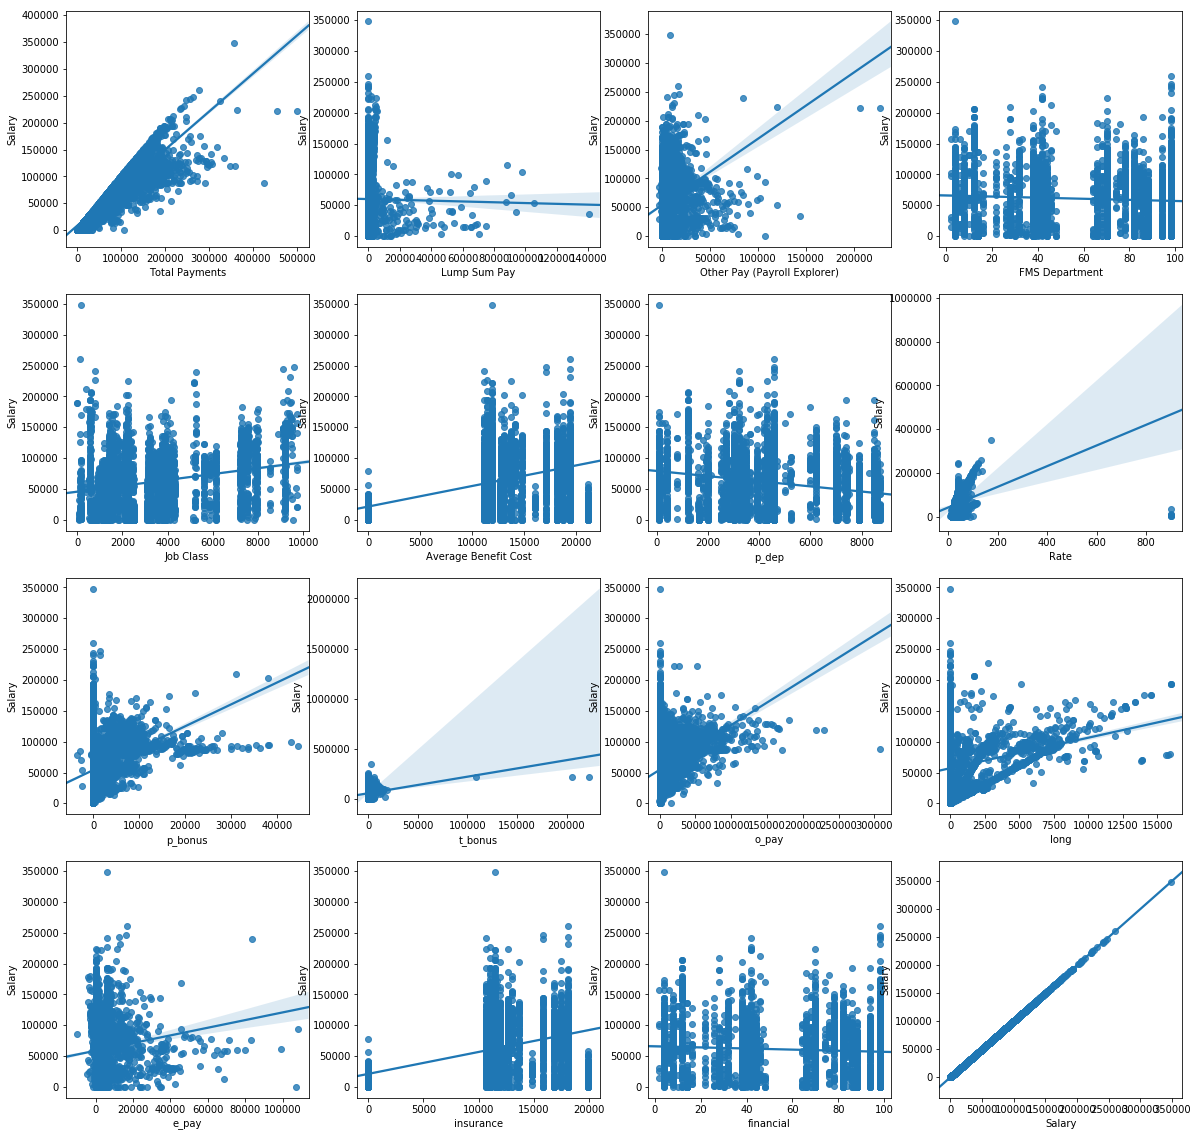

In [114]:
# Draw scatterplot 
plt.figure(figsize=(20,20))
for i in range(1,17):
    plt.subplot(4,4,i)
    sns.regplot(x=df_sample[cols[i-1]], y=df_sample["Salary"])


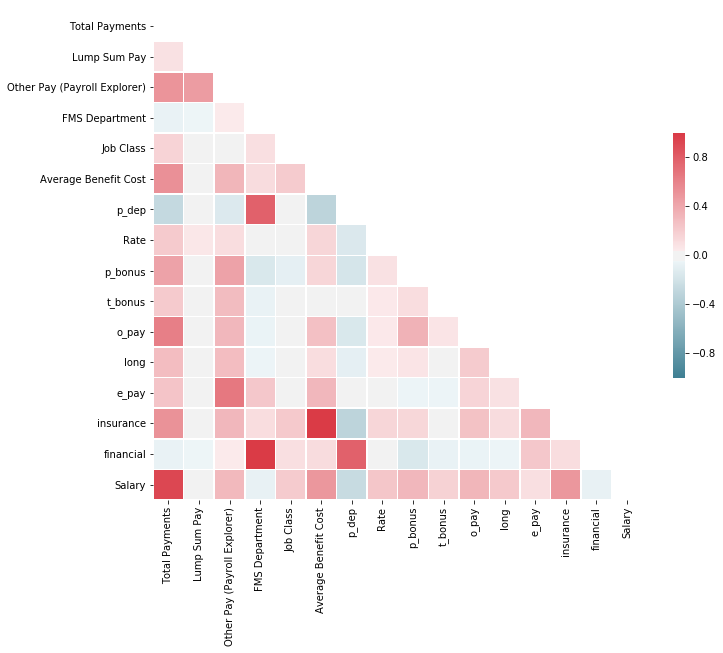

In [6]:
# Draw Correlation Plot
corr = df_sample.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

In [59]:
# onehot encoding
categotical_features = ["e_type", "benefit", "Time", "p_grade"]
dummy_df = pd.get_dummies(df, columns=categotical_features)
column_name = [i for i in dummy_df.columns if i != "Salary"]+["Salary"]
dummy_df = dummy_df[column_name]
dummy_df

,Total Payments,Lump Sum Pay,Other Pay (Payroll Explorer),FMS Department,Job Class,Average Benefit Cost,p_dep,Rate,p_bonus,t_bonus,...,p_grade_L,p_grade_M,p_grade_N,p_grade_S,p_grade_T,p_grade_V,p_grade_X,p_grade_Y,p_grade_Z,Salary
161542,4847.83,0.00,1740.73,98,941,18755.63,4594.945881,31.290000,0.00,0.00,...,0,0,0,0,0,0,0,0,0,3107.10
167941,56481.08,0.00,3480.12,14,1358,11435.16,1603.000000,26.470000,2869.48,0.00,...,0,0,0,0,0,0,0,0,0,51560.00
244088,138165.59,0.00,4609.98,98,3115,19392.62,4594.945881,38.260000,0.00,0.00,...,0,0,0,0,0,0,0,0,0,78058.00
15392,111777.71,0.00,14526.10,70,2214,12740.52,4301.000000,52.660000,13293.10,1233.00,...,0,0,0,0,0,0,0,0,0,94630.06
69682,9961.87,0.00,565.20,88,2498,0.00,7903.000000,14.790000,0.00,304.00,...,0,0,0,0,0,0,0,0,0,9396.67
102742,103522.21,2278.97,10909.15,94,3839,11421.48,8501.000000,47.480000,0.00,1300.00,...,0,0,0,0,0,0,0,0,0,91188.70
323044,62606.60,0.00,1125.00,98,1368,19392.62,4594.945881,34.380000,0.00,0.00,...,0,0,0,0,0,0,0,0,0,49468.80
166287,6957.62,0.00,0.00,94,1502,0.00,8502.000000,15.410000,0.00,0.00,...,0,0,0,0,0,0,0,0,0,6957.62
248937,77096.72,0.00,1110.00,82,3580,11894.13,7028.000000,36.110000,0.00,1110.00,...,0,0,0,0,0,0,0,0,0,71789.11
135338,63116.85,22207.72,23498.64,82,3580,11435.16,7031.000000,35.380000,0.00,430.00,...,0,0,0,0,0,0,0,0,0,38739.20


In [8]:
# Train test split
# Original Data
from sklearn.model_selection import train_test_split

X = dummy_df[dummy_df.columns[:-1]]
y = dummy_df[df.columns[-1]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


In [20]:
# Train test split
# split the data by one cutoff point
cutoff = 100000
smaller_df = dummy_df.loc[dummy_df["Salary"] <= cutoff]
larger_df = dummy_df.loc[dummy_df["Salary"] > cutoff]
X_smaller = smaller_df[smaller_df.columns[:-1]]
y_smaller = smaller_df[smaller_df.columns[-1]]
X_larger = larger_df[smaller_df.columns[:-1]]
y_larger = larger_df[smaller_df.columns[-1]]
Xs_train, Xs_test, ys_train, ys_test = train_test_split(X_smaller, y_smaller, test_size=0.3, random_state=0)
Xl_train, Xl_test, yl_train, yl_test = train_test_split(X_larger, y_larger, test_size=0.3, random_state=0)

In [107]:
# Train test split
# Standardization

from sklearn.preprocessing import StandardScaler

dummy_cols =[i for i in dummy_df.columns if i not in num_cols and i != "Salary"]

stdsc = StandardScaler()
X_train_num_std = stdsc.fit_transform(X_train[num_cols])
X_train_num_std = pd.DataFrame(X_train_num_std,columns=num_cols)
X_train_std = pd.concat([X_train_num_std , X_train[dummy_cols].reset_index()], axis=1).set_index("index")

X_test_num_std = stdsc.transform(X_test[num_cols])
X_test_num_std = pd.DataFrame(X_test_num_std,columns=num_cols)

X_test_std = pd.concat([X_test_num_std , X_test[dummy_cols].reset_index()], axis=1).set_index("index")

stdsc2 = StandardScaler()
y_train_std = stdsc2.fit_transform(y_train.values.reshape(-1, 1))
y_test_std = stdsc2.transform(y_test.values.reshape(-1, 1))

In [115]:
for i in [X_train_std, y_train, X_test_std, y_test]:
    print (i.shape)
    
print("-------------")
for i in [X_train, y_train, X_test, y_test]:
    print (i.shape)
    
print("--------------")
print(y_train_std.shape, y_test_std.shape)
print(y_train.shape, y_test.shape)
type(y_train)

(56000, 58)
(56000,)
(24000, 58)
(24000,)
-------------
(56000, 58)
(56000,)
(24000, 58)
(24000,)
--------------
(56000, 1) (24000, 1)
(56000,) (24000,)


pandas.core.series.Series

count     80000.000000
mean      59567.271010
std       41444.016898
min       -1574.400000
25%       20269.762500
50%       61526.680000
75%       91034.412500
max      360942.400000
Name: Salary, dtype: float64

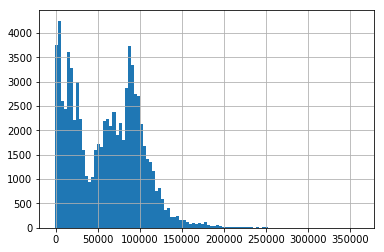

In [10]:
y.hist(bins=100)
y.describe()

In [11]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
def model_eval(model,X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test):
    """PyML P477-480
    Plot residual plot , dots should be located around the 0 line, and have no pattern
    R_square should be close to 1
    MSE should be small
    """
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    print('R^2 train: %.3f, test: %.3f' %(r2_score(y_train, y_train_pred), r2_score(y_test, y_test_pred)))
    print("R2",model.score(X_train, y_train))
    print("R2 Adj",1 - (1-model.score(X_train, y_train))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
    
    mse_train = mean_squared_error(y_train, y_train_pred)
    mse_test = mean_squared_error(y_test, y_test_pred)
    print('MSE train: %.3f, test: %.3f' %(mse_train, mse_test))
    print('Over fitting' if mse_train < mse_test else 'Under fitting')
    
    plt.figure(figsize=(10,10))
    plt.scatter(y_train_pred, y_train_pred - y_train, c='steelblue', marker='o', edgecolor='white', label='Training data')
    plt.scatter(y_test_pred, y_test_pred - y_test, c='limegreen', marker='s', edgecolor='white', label='Test data')
    plt.xlabel('Predicted values')
    plt.ylabel('Residuals')
    plt.legend(loc='upper left')
    #plt.hlines(y=0, xmin=-10, xmax=350000,color='black', lw=2)
    plt.show()
    


In [12]:
X_train["Total Payments"].shape
y_train.shape

(56000,)

R^2 train: 0.856, test: 0.852
R2 0.8559426238484691
R2 Adj 0.855940051303447
MSE train: 246744485.639, test: 256477722.873
Over fitting


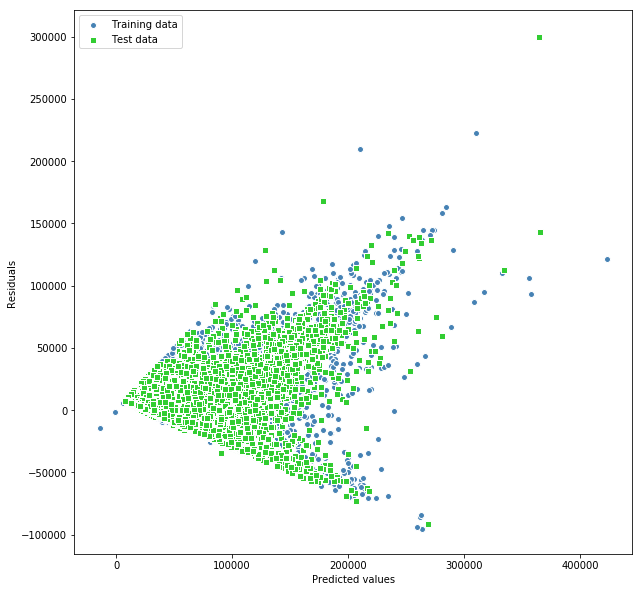

Wall time: 1.86 s


In [13]:
%%time
# Linear model with one feature

from sklearn.linear_model import LinearRegression
slr = LinearRegression()
slr.fit(X_train["Total Payments"].values.reshape(-1,1),y_train)

model_eval(slr, X_test=X_test["Total Payments"].values.reshape(-1,1), X_train=X_train["Total Payments"].values.reshape(-1,1))

R^2 train: 1.000, test: 1.000
R2 0.9999995132452177
R2 Adj 0.9999995127405471
MSE train: 833.724, test: 756.527
Under fitting


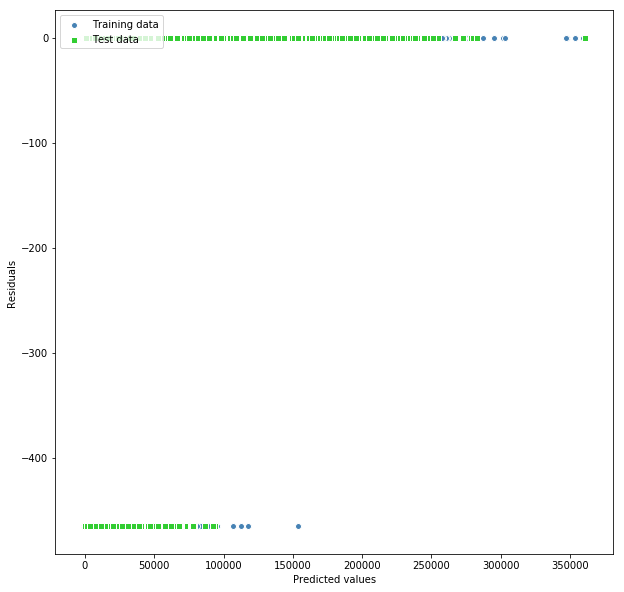

In [14]:
from sklearn.linear_model import RANSACRegressor
ransac = RANSACRegressor(LinearRegression(), max_trials=100, min_samples=50, loss='absolute_loss', residual_threshold=5.0, random_state=42)
ransac.fit(X_train, y_train)
model_eval(ransac)

R^2 train: 1.000, test: 1.000
R2 0.9999994417034443
R2 Adj 0.9999994410154049
MSE train: 595.743, test: 525.995
Under fitting


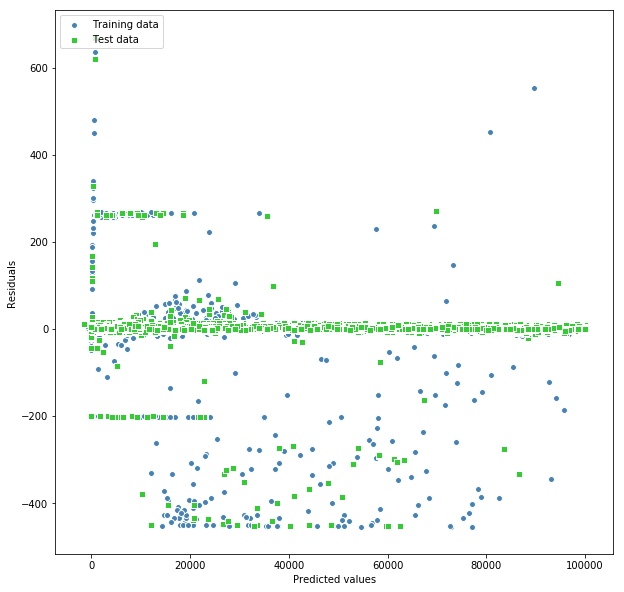

R^2 train: 1.000, test: 1.000
R2 0.9999999207695653
R2 Adj 0.9999999202484308
MSE train: 47.416, test: 56.058
Over fitting


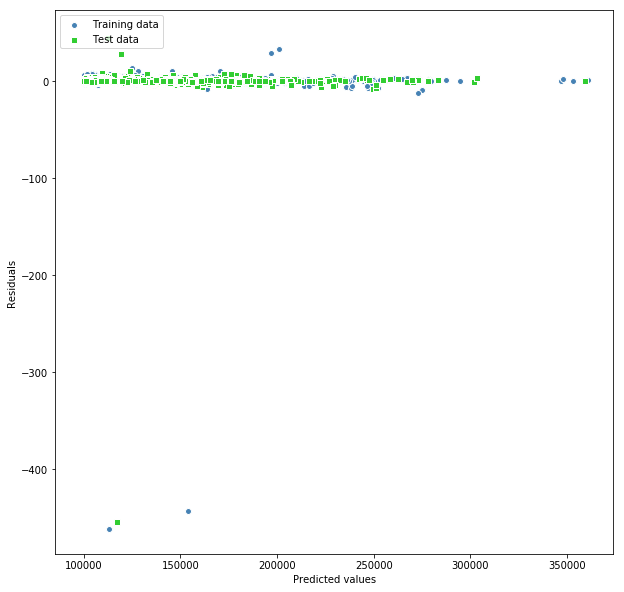

Wall time: 2.38 s


In [21]:
%%time
# Linear model with splited larger-smaller parts

from sklearn.linear_model import LinearRegression
slr = LinearRegression()
slr.fit(Xs_train,ys_train)

model_eval(slr,X_train=Xs_train, y_train=ys_train, X_test=Xs_test, y_test=ys_test)

from sklearn.linear_model import LinearRegression
slr = LinearRegression()
slr.fit(Xl_train,yl_train)

model_eval(slr,X_train=Xl_train, y_train=yl_train, X_test=Xl_test, y_test=yl_test)

R^2 train: 1.000, test: 1.000
R2 0.9999996008716474
R2 Adj 0.9999996007647075
MSE train: 683.635, test: 566.737
Under fitting


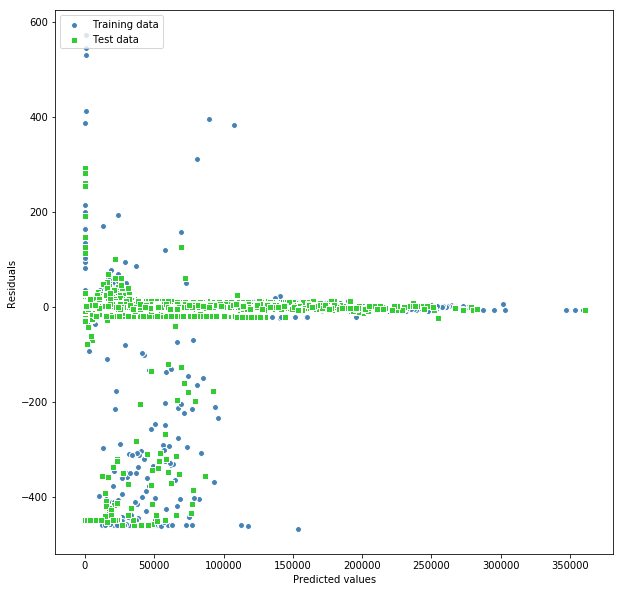

Wall time: 2.05 s


In [117]:
%%time
# Linear model with standardized data

from sklearn.linear_model import LinearRegression
slr = LinearRegression()
slr.fit(X_train_num_std,y_train)

model_eval(slr, X_train=X_train_num_std, X_test=X_test_num_std, y_train=y_train, y_test=y_test)

# I don't know what's wrong with this part...

R^2 train: 1.000, test: 1.000
R2 0.9999997020137475
R2 Adj 0.9999997017047935
MSE train: 510.397, test: 466.703
Under fitting


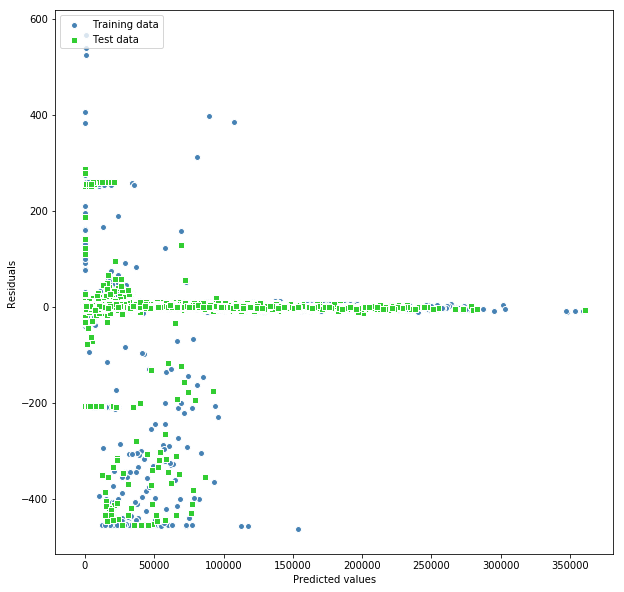

Wall time: 2.19 s


In [16]:
%%time
# Linear model

from sklearn.linear_model import LinearRegression
slr = LinearRegression()
slr.fit(X_train,y_train)

model_eval(slr)


Ridge
R^2 train: 1.000, test: 1.000
R2 0.999999701986679
R2 Adj 0.9999997016776968
MSE train: 510.443, test: 466.422
Under fitting


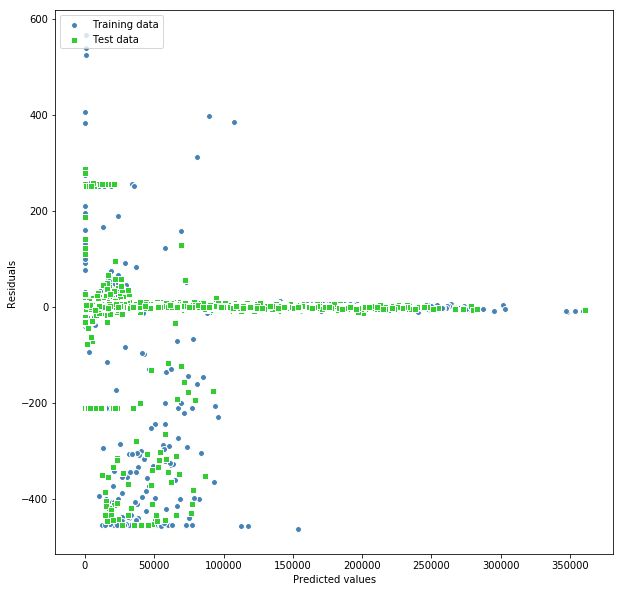

Lasso
R^2 train: 1.000, test: 1.000
R2 0.9999987066534188
R2 Adj 0.9999987053124685
MSE train: 2215.271, test: 2125.770
Under fitting


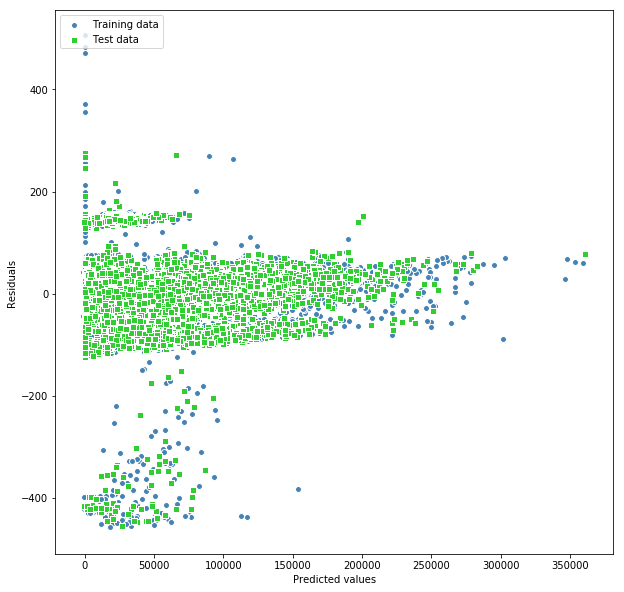

ElasticNet
R^2 train: 1.000, test: 1.000
R2 0.9999951321862438
R2 Adj 0.9999951271392622
MSE train: 8337.693, test: 8395.303
Over fitting


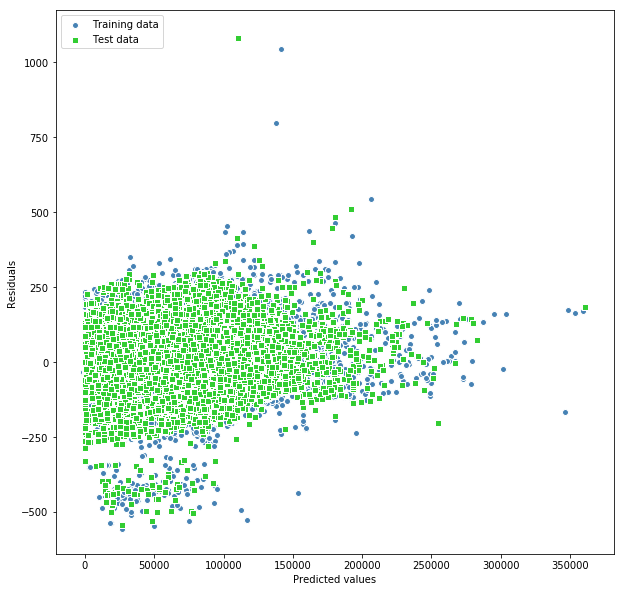

In [17]:
# Regularized Methods(Ridge, Least Absolute Shrinkage and Selection Operator (LASSO), Elastic Net)
print("Ridge")
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
model_eval(ridge)

print("Lasso")
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=1.0)
lasso.fit(X_train, y_train)
model_eval(lasso)

print("ElasticNet")
from sklearn.linear_model import ElasticNet
elanet = ElasticNet(alpha=1.0, l1_ratio=0.5)
elanet.fit(X_train, y_train)
model_eval(elanet)

R^2 train: 0.948, test: 0.948
R2 0.9483370408934378
R2 Adj 0.9482834763946234
MSE train: 88489396.460, test: 90093448.216
Over fitting


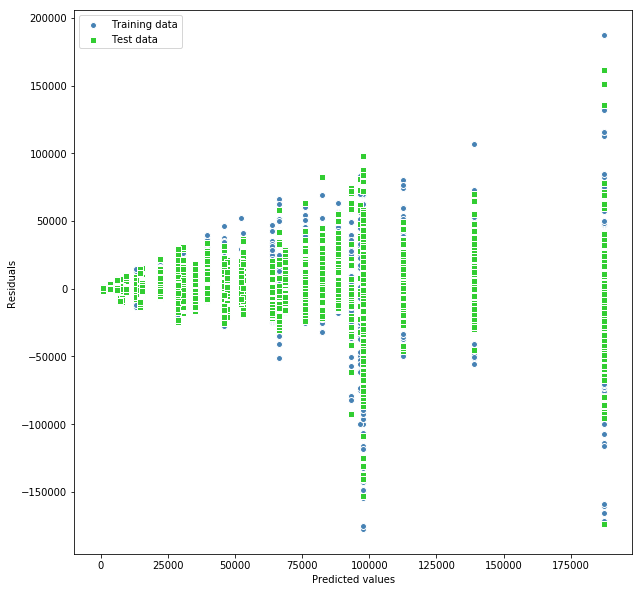

In [18]:
# Decision Tree Regression and Random forest Regression

# Decision Tree Regression
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor(max_depth=5)
tree.fit(X_train, y_train)
model_eval(tree)

R^2 train: 0.999, test: 0.995
R2 0.9994693554442313
R2 Adj 0.9994688052684347
MSE train: 908899.089, test: 8648764.551
Over fitting


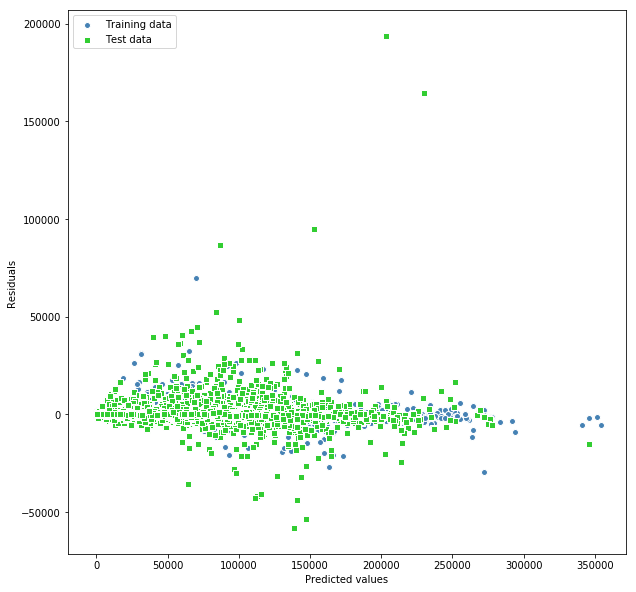

Wall time: 44.9 s


In [19]:
%%time
# Random Forest Regression
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor(n_estimators=100, max_depth=None,criterion = 'mse', random_state=42, n_jobs=-1)
forest.fit(X_train, y_train)
model_eval(forest)